<a href="https://colab.research.google.com/github/bhanup6663/COMP691_DL/blob/bhanu/assignment2-1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

convnet = [[11, 4, 0], [3, 2, 0], [5, 1, 2], [3, 2, 0], [3, 1, 1], [3, 1, 1], [3, 1, 1], [3, 2, 0], [6, 1, 0]]
layer_names = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3', 'conv4', 'conv5', 'pool5', 'fc6-con']
imsize = 227

def calculate_output_size(conv, layer_in):
    n_in = layer_in[0]
    j_in = layer_in[1]
    r_in = layer_in[2]
    start_in = layer_in[3]
    k = conv[0]
    s = conv[1]
    p = conv[2]
    n_out = math.floor((n_in - k + 2*p) / s) + 1
    actual_p = (n_out - 1) * s - n_in + k
    p_r = math.ceil(actual_p / 2)
    p_l = math.floor(actual_p / 2)
    j_out = j_in * s
    r_out = r_in + (k - 1) * j_in
    start_out = start_in + ((k - 1) / 2 - p_l) * j_in
    return n_out, j_out, r_out, start_out

def print_layer_info(layer, layer_name):
    print(layer_name + ":")
    print("\t n features: %s \n \t jump: %s \n \t receptive size: %s \t start: %s " % (layer[0], layer[1], layer[2], layer[3]))

layer_infos = []

# First layer is the data layer (image) with n_0 = image size; j_0 = 1; r_0 = 1; and start_0 = 1
current_layer = [imsize, 1, 1, 1]
print_layer_info(current_layer, "input image")

for i in range(len(convnet)):
    current_layer = calculate_output_size(convnet[i], current_layer)
    layer_infos.append(current_layer)
    print_layer_info(current_layer, layer_names[i])

layer_name = "conv1"
print_layer_names = ['conv1', 'pool1', 'conv2', 'pool2']

for layer_name in print_layer_names:
    layer_idx = layer_names.index(layer_name)
    idx_x = 1
    idx_y = 1
    n = layer_infos[layer_idx][0]
    j = layer_infos[layer_idx][1]
    r = layer_infos[layer_idx][2]
    start = layer_infos[layer_idx][3]
    if idx_x < n:
        print(layer_name, ':')
        print('number of features=', n)
        print("receptive field: (%s, %s)" % (r, r))
        print("start: (%s, %s)" % ((start + idx_x * j) - r / 2, (start + idx_y * j) - r / 2))
        print("center: (%s, %s)" % (start + idx_x * j, start + idx_y * j))
        print("end: (%s, %s)" % ((start + idx_x * j) + r / 2, (start + idx_y * j) + r / 2))
        print('-------------------------')


input image:
	 n features: 227 
 	 jump: 1 
 	 receptive size: 1 	 start: 1 
conv1:
	 n features: 55 
 	 jump: 4 
 	 receptive size: 11 	 start: 6.0 
pool1:
	 n features: 27 
 	 jump: 8 
 	 receptive size: 19 	 start: 10.0 
conv2:
	 n features: 27 
 	 jump: 8 
 	 receptive size: 51 	 start: 10.0 
pool2:
	 n features: 13 
 	 jump: 16 
 	 receptive size: 67 	 start: 18.0 
conv3:
	 n features: 13 
 	 jump: 16 
 	 receptive size: 99 	 start: 18.0 
conv4:
	 n features: 13 
 	 jump: 16 
 	 receptive size: 131 	 start: 18.0 
conv5:
	 n features: 13 
 	 jump: 16 
 	 receptive size: 163 	 start: 18.0 
pool5:
	 n features: 6 
 	 jump: 32 
 	 receptive size: 195 	 start: 34.0 
fc6-con:
	 n features: 1 
 	 jump: 32 
 	 receptive size: 355 	 start: 114.0 
conv1 :
number of features= 55
receptive field: (11, 11)
start: (4.5, 4.5)
center: (10.0, 10.0)
end: (15.5, 15.5)
-------------------------
pool1 :
number of features= 27
receptive field: (19, 19)
start: (8.5, 8.5)
center: (18.0, 18.0)
end: (27.5,

1B

In [2]:
import requests

labels_url = 'https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
response = requests.get(labels_url)
if response.status_code == 200:
    categories = eval(response.text)
else:
    print("Failed to download the ImageNet labels.")
    categories = {}

In [3]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import requests
from io import BytesIO

In [4]:
model = models.alexnet(pretrained=True).eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 156MB/s]


In [5]:
if torch.cuda.is_available():
    model.cuda()

In [6]:
def preprocess(image):
    transform_pipeline = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform_pipeline(image)


In [7]:
def get_image_label(processed_image, categories):
    if torch.cuda.is_available():
        processed_image = processed_image.to('cuda')

    with torch.no_grad():
        outputs = model(processed_image.unsqueeze(0))
        _, predicted = torch.max(outputs, 1)
        predicted_label_index = predicted.item()

    return predicted_label_index, categories[predicted_label_index]

In [8]:
urls=["https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n01503061_3560_bird.jpg",
 "https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n01495701_1287_ray.jpg",
 "https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n01982650_3364_lobster.jpg",
 "https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n02924116_29310_bus.jpg",
 "https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n07880968_830_burrito.jpg"]


In [9]:
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        try:
            image = Image.open(BytesIO(response.content))
            processed_image = preprocess(image)
            label_code, label = get_image_label(processed_image, categories)
            print(f"Predicted label: {label}")
        except Exception as e:
            print(f"Error processing image from {url}: {e}")
    else:
        print(f"Failed to retrieve image from {url}. Status code: {response.status_code}")

Predicted label: dowitcher
Predicted label: scuba diver
Predicted label: crayfish, crawfish, crawdad, crawdaddy
Predicted label: trolleybus, trolley coach, trackless trolley
Predicted label: burrito


1C

In [10]:
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [11]:
def preprocess(image):
    transform_pipeline = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image_tensor = transform_pipeline(image).unsqueeze(0)
    if torch.cuda.is_available():
        image_tensor = image_tensor.cuda()
    return image_tensor

def tensor_to_image(tensor):
    tensor = tensor.squeeze().detach()
    if tensor.is_cuda:
        tensor = tensor.cpu()
    tensor = tensor.mul(torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)).add(torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1))
    tensor = tensor.clip(0, 1)
    image = transforms.ToPILImage()(tensor)
    return image

In [12]:
def generate_adversarial(input_image, target_class, iterations=30, lr=0.005):
    target_variable = Variable(torch.LongTensor([target_class]), requires_grad=False)
    if torch.cuda.is_available():
        target_variable = target_variable.cuda()

    img_variable = Variable(input_image, requires_grad=True)
    optimizer = Adam([img_variable], lr=lr)
    criterion = nn.CrossEntropyLoss()

    for iteration in range(iterations):
        optimizer.zero_grad()
        output = model(img_variable)
        loss = criterion(output, target_variable)
        loss.backward()
        optimizer.step()

        _, predicted = output.max(1)
        if predicted.item() == target_class:
            print("Early stopping, target class achieved.")
            break

    return img_variable

Early stopping, target class achieved.


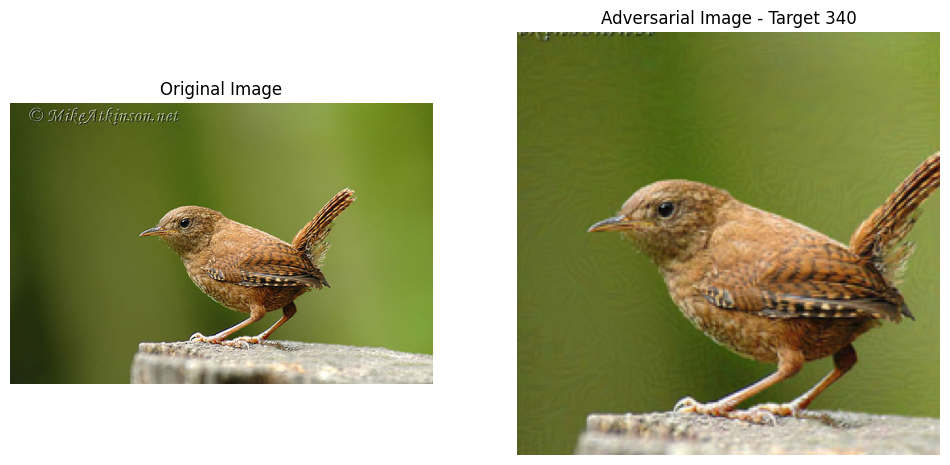

Early stopping, target class achieved.


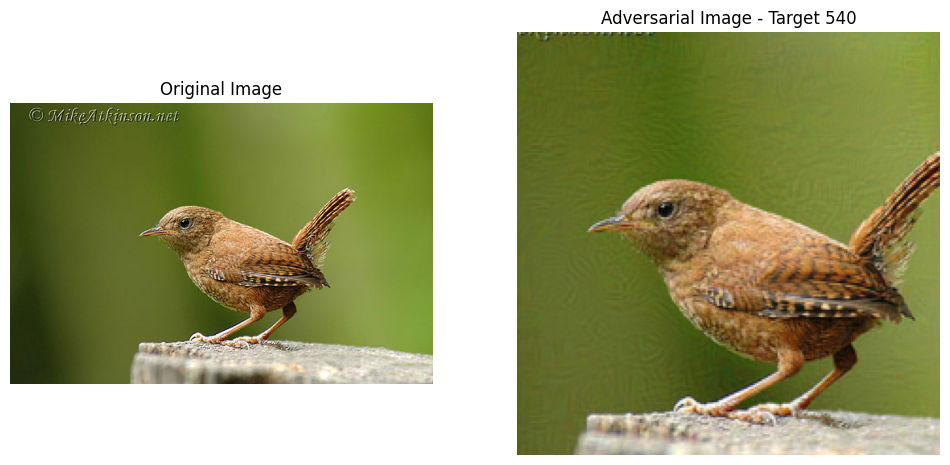

Early stopping, target class achieved.


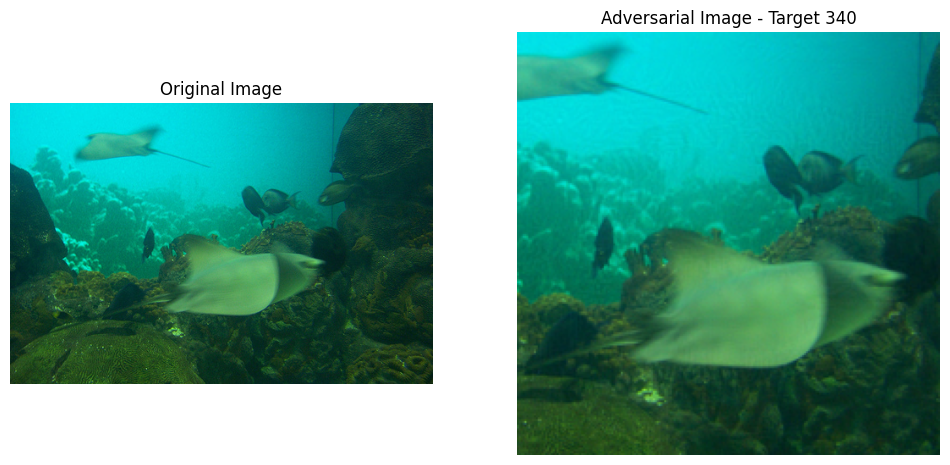

Early stopping, target class achieved.


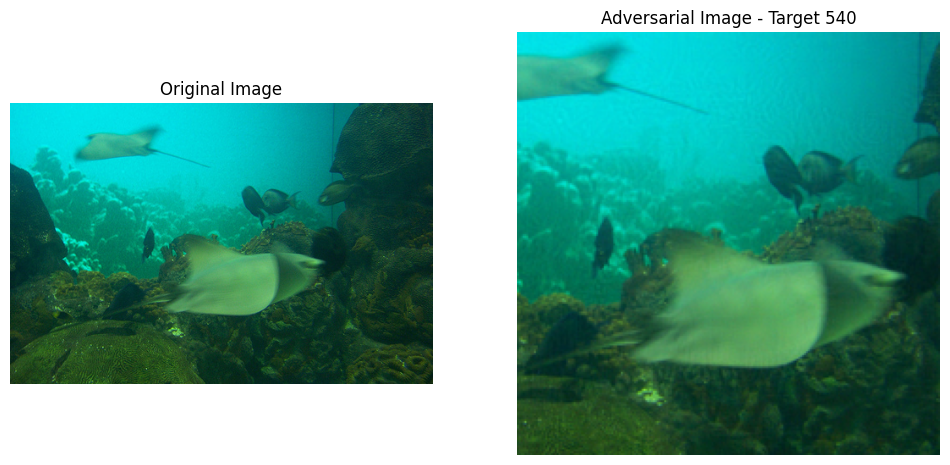

Early stopping, target class achieved.


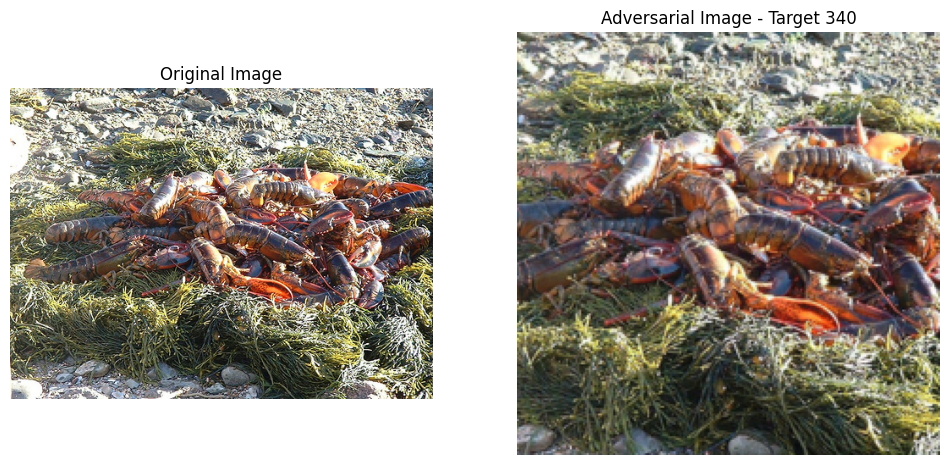

Early stopping, target class achieved.


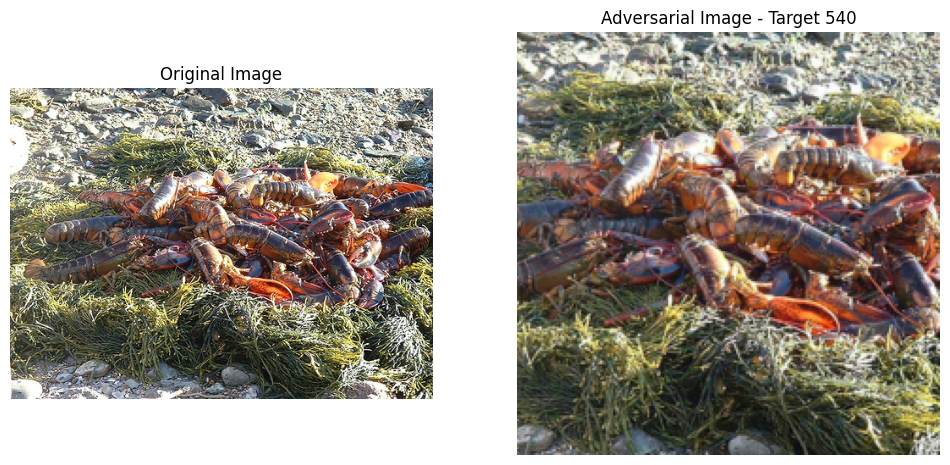

Early stopping, target class achieved.


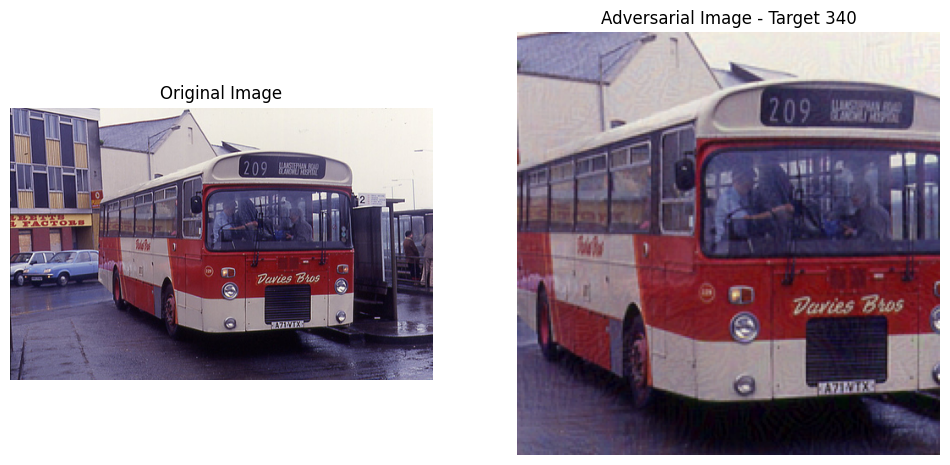

Early stopping, target class achieved.


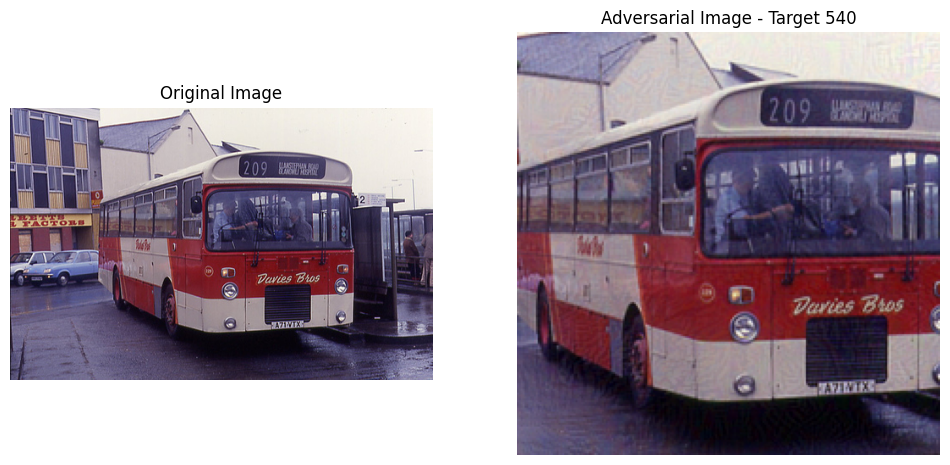

Early stopping, target class achieved.


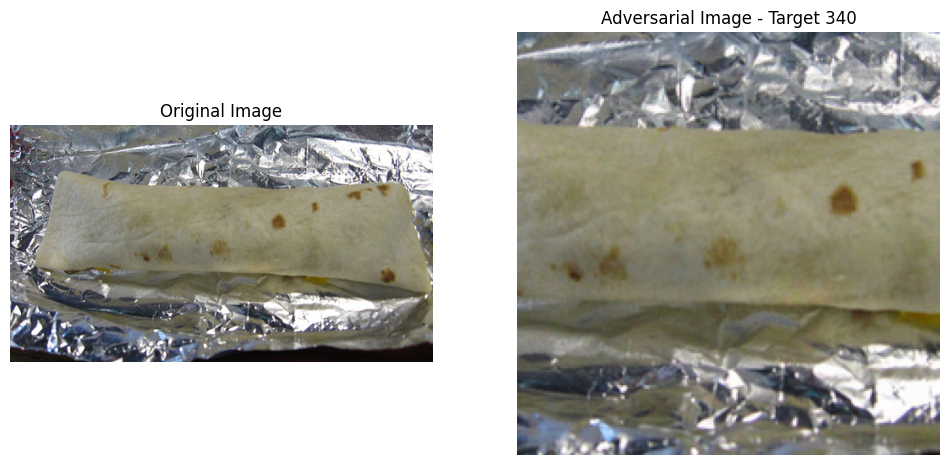

Early stopping, target class achieved.


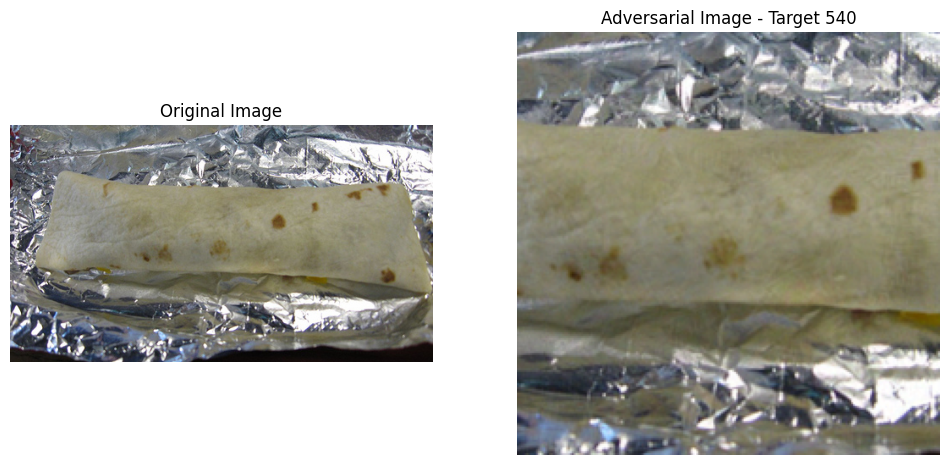

In [13]:
targets = [340, 540]

for url in urls:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    processed_image = preprocess(image)
    for target in targets:
        adv_image_tensor = generate_adversarial(processed_image, target)
        adv_image = tensor_to_image(adv_image_tensor)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(adv_image)
        plt.title(f'Adversarial Image - Target {target}')
        plt.axis('off')

        plt.show()

# 🦜 NN-Based Language Model
In this excercise we will run a basic RNN based language model and answer some questions about the code. It is advised to use GPU to run the code. First run the code then answer the questions below that require modifying it.

In [14]:
#@title 🧮 Imports & Hyperparameter Setup
#@markdown Feel free to experiment with the following hyperparameters at your
#@markdown leasure. For the purpose of this assignment, leave the default values
#@markdown and run the code with these suggested values.
# Some part of the code was referenced from below.
# https://github.com/pytorch/examples/tree/master/word_language_model
# https://github.com/yunjey/pytorch-tutorial/tree/master/tutorials/02-intermediate/language_model

! git clone https://github.com/yunjey/pytorch-tutorial/
%cd pytorch-tutorial/tutorials/02-intermediate/language_model/

import torch
import torch.nn as nn
import numpy as np
from torch.nn.utils import clip_grad_norm_

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
embed_size = 128 #@param {type:"number"}
hidden_size = 1024 #@param {type:"number"}
num_layers = 1 #@param {type:"number"}
num_epochs = 5 #@param {type:"slider", min:1, max:10, step:1}
batch_size = 20 #@param {type:"number"}
seq_length = 30 #@param {type:"number"}
learning_rate = 0.002 #@param {type:"number"}
#@markdown Number of words to be sampled ⬇️
num_samples = 50 #@param {type:"number"}

print(f"--> Device selected: {device}")


Cloning into 'pytorch-tutorial'...
remote: Enumerating objects: 917, done.
remote: Total 917 (delta 0), reused 0 (delta 0), pack-reused 917
Receiving objects: 100% (917/917), 12.80 MiB | 26.54 MiB/s, done.
Resolving deltas: 100% (491/491), done.
/content/pytorch-tutorial/tutorials/02-intermediate/language_model
--> Device selected: cuda


In [15]:
from data_utils import Dictionary, Corpus

# Load "Penn Treebank" dataset
corpus = Corpus()
ids = corpus.get_data('data/train.txt', batch_size)
vocab_size = len(corpus.dictionary)
num_batches = ids.size(1) // seq_length

print(f"Vcoabulary size: {vocab_size}")
print(f"Number of batches: {num_batches}")

Vcoabulary size: 10000
Number of batches: 1549


## 🤖 Model Definition
As you can see below, this model stacks `num_layers` many [LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) units vertically to construct our basic RNN-based language model. The diagram below shows a pictorial representation of the model in its simplest form (i.e `num_layers`=1).
![Pictorial Representation of The Model](https://upload.wikimedia.org/wikipedia/commons/6/63/Long_Short-Term_Memory.svg)

In [16]:
# RNN based language model
class RNNLM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(RNNLM, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, h):
        # Embed word ids to vectors
        x = self.embed(x)

        # Forward propagate LSTM
        out, (h, c) = self.lstm(x, h)

        # Reshape output to (batch_size*sequence_length, hidden_size)
        out = out.reshape(out.size(0)*out.size(1), out.size(2))

        # Decode hidden states of all time steps
        out = self.linear(out)
        return out, (h, c)

## 🏓 Training
In this section we will train our model, this should take a couple of minutes! Be patient 😊

In [17]:
model = RNNLM(vocab_size, embed_size, hidden_size, num_layers).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Truncated backpropagation
def detach(states):
    return [state.detach() for state in states]


# Train the model
for epoch in range(num_epochs):
    # Set initial hidden and cell states
    states = (torch.zeros(num_layers, batch_size, hidden_size).to(device),
              torch.zeros(num_layers, batch_size, hidden_size).to(device))

    for i in range(0, ids.size(1) - seq_length, seq_length):
        # Get mini-batch inputs and targets
        inputs = ids[:, i:i+seq_length].to(device)
        targets = ids[:, (i+1):(i+1)+seq_length].to(device)

        # Forward pass
        states = detach(states)
        outputs, states = model(inputs, states)
        loss = criterion(outputs, targets.reshape(-1))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        step = (i+1) // seq_length
        if step % 100 == 0:
            print ('Epoch [{}/{}], Step[{}/{}], Loss: {:.4f}, Perplexity: {:5.2f}'
                   .format(epoch+1, num_epochs, step, num_batches, loss.item(), np.exp(loss.item())))

Epoch [1/5], Step[0/1549], Loss: 9.2143, Perplexity: 10039.37
Epoch [1/5], Step[100/1549], Loss: 6.0116, Perplexity: 408.14
Epoch [1/5], Step[200/1549], Loss: 5.9377, Perplexity: 379.08
Epoch [1/5], Step[300/1549], Loss: 5.7663, Perplexity: 319.37
Epoch [1/5], Step[400/1549], Loss: 5.6456, Perplexity: 283.06
Epoch [1/5], Step[500/1549], Loss: 5.1302, Perplexity: 169.06
Epoch [1/5], Step[600/1549], Loss: 5.1873, Perplexity: 178.99
Epoch [1/5], Step[700/1549], Loss: 5.3409, Perplexity: 208.70
Epoch [1/5], Step[800/1549], Loss: 5.1730, Perplexity: 176.45
Epoch [1/5], Step[900/1549], Loss: 5.1023, Perplexity: 164.40
Epoch [1/5], Step[1000/1549], Loss: 5.1391, Perplexity: 170.56
Epoch [1/5], Step[1100/1549], Loss: 5.3632, Perplexity: 213.41
Epoch [1/5], Step[1200/1549], Loss: 5.1761, Perplexity: 177.00
Epoch [1/5], Step[1300/1549], Loss: 5.1094, Perplexity: 165.58
Epoch [1/5], Step[1400/1549], Loss: 4.8246, Perplexity: 124.54
Epoch [1/5], Step[1500/1549], Loss: 5.1540, Perplexity: 173.12
Ep

## 1️⃣ Q2.1 Detaching or not? (10 points)



i.                              Explain the implementation (compared to not using truncated backprop through time).

Answer: Typical recurrent neural network (RNN) training process, backpropagation through time (BPTT) involves unrolling the network across all the time steps of the input sequence and then computing gradients from the output back to the inputs. For long sequences, this can lead to high computational costs and significant memory requirements, as the gradients for each parameter are computed by considering their influence over many time steps. It can also contribute to the vanishing and exploding gradients problem.

Truncated backpropagation through time addresses these issues by limiting the number of time steps over which the gradients are propagated backward. This is done by periodically detaching the hidden state from the computation graph. In other words, the backward pass is truncated to a fixed number of steps, which means the model is prevented from backpropagating all the way to the start of the sequence. This effectively resets the computational graph and reduces the memory footprint since the gradients are not stored for the entire sequence.


ii.                              What does the detach() call here achieve? Draw a computational graph.

Answer: The detach() function in PyTorch disconnects the hidden state from the part of the computation graph that generated it. This means that:
Gradient Flow Restriction: It stops gradients from flowing back further than the detach point. This is crucial for implementing TBPTT because it limits the backward pass to only a portion of the sequence, thereby avoiding the computation over the entire sequence length.

Memory Efficiency: By detaching the graph, PyTorch can release the memory used for the gradients of the detached parts earlier in the sequence. This is why less GPU memory is observed during training. It doesn't need to keep the gradients for the entire sequence, which can be quite large, leading to more efficient memory usage.

## 🔮 Model Prediction
Below we will use our model to generate text sequence!

In [18]:
# Sample from the model
with torch.no_grad():
    with open('sample.txt', 'w') as f:
        # Set intial hidden ane cell states
        state = (torch.zeros(num_layers, 1, hidden_size).to(device),
                 torch.zeros(num_layers, 1, hidden_size).to(device))

        # Select one word id randomly
        prob = torch.ones(vocab_size)
        input = torch.multinomial(prob, num_samples=1).unsqueeze(1).to(device)

        for i in range(num_samples):
            # Forward propagate RNN
            output, state = model(input, state)

            # Sample a word id
            prob = output.exp()
            word_id = torch.multinomial(prob, num_samples=1).item()

            # Fill input with sampled word id for the next time step
            input.fill_(word_id)

            # File write
            word = corpus.dictionary.idx2word[word_id]
            word = '\n' if word == '<eos>' else word + ' '
            f.write(word)

            if (i+1) % 100 == 0:
                print('Sampled [{}/{}] words and save to {}'.format(i+1, num_samples, 'sample.txt'))
! cat sample.txt

13th messages grown in the coming decade and the actual rich will see the effect of any reason to buy themselves 
the case likely to be called ingersoll founder and popularity of britain 's leading automotive policies automobiles japan 's newspaper advanced like a <unk> in beijing 
the 

iii.                              When using using line 7-9 we will typically observe less GPU memory being used during training, explain why in your answer.

Answer: Without using TBPTT, the GPU memory needs to store: Activations at each time step for the entire sequence to compute gradients during the backward pass.

Gradients for each model parameter with respect to each time step in the sequence. With TBPTT and the use of detach(), the memory only needs to store: Activations for a truncated number of time steps.
Gradients for each model parameter with respect to the time steps in the truncated window. This significantly reduces the memory footprint, especially for long sequences, and enables training on longer sequences or fitting larger models into memory

## 2️⃣ Q2.2 Sampling strategy (5 points)
Consider the sampling procedure above. The current code samples a word:
```python
word_id = torch.multinomial(prob, num_samples=1).item()
```
in order to feed the model at each output step and feeding those to the next timestep. Copy below the above cell and modify this sampling startegy to use a greedy sampling which selects the highest probability word at each time step to feed as the next input.

In [19]:
# Sample greedily from the model and print the output
with torch.no_grad():
    generated_text = ''  # Initialize an empty string to collect generated text
    # Set initial hidden and cell states
    state = (torch.zeros(num_layers, 1, hidden_size).to(device),
             torch.zeros(num_layers, 1, hidden_size).to(device))

    # Select one word id randomly
    prob = torch.ones(vocab_size)
    input = torch.multinomial(prob, num_samples=1).unsqueeze(1).to(device)

    for i in range(num_samples):
        # Forward propagate RNN
        output, state = model(input, state)

        # Greedy sampling: select the word with the highest probability
        _, word_id = output.max(dim=-1)
        word_id = word_id.item()

        # Prepare input for next time step
        input.fill_(word_id)

        # Convert word_id back to a word
        word = corpus.dictionary.idx2word[word_id]
        word = '\n' if word == '<eos>' else word + ' '

        # Append the generated word to the text
        generated_text += word

        if (i+1) % 100 == 0:
            print(f'Sampled [{i+1}/{num_samples}] words.')

    # Print the entire generated text
    print('Generated Text:\n', generated_text)


Generated Text:
 retaining the <unk> of the <unk> 
the <unk> of mr. honecker and his team stopped paying thin <unk> to the <unk> of the <unk> and the league 's <unk> <unk> 
the <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> jailed the <unk> <unk> <unk> <unk> 


##
2.3 Teacher Forcing (Extra Credit 2 points)
What is teacher forcing?
> Teacher forcing works by using the actual or expected output from the training dataset at the current time step $y(t)$ as input in the next time step $X(t+1)$, rather than the output generated by the network.

In the `🏓 Training` code this is achieved, implicitly, when we pass the entire input sequence (`inputs = ids[:, i:i+seq_length].to(device)`) to the model at once.

Copy below the `🏓 Training` code and modify it to disable teacher forcing training. Compare the performance of this model, to original model, what can you conclude? (compare perplexity and convergence rate)

In [20]:
# Training code without Teacher Forcing corrected for backward pass
model = RNNLM(vocab_size, embed_size, hidden_size, num_layers).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    states = (torch.zeros(num_layers, batch_size, hidden_size).to(device),
              torch.zeros(num_layers, batch_size, hidden_size).to(device))

    for i in range(0, ids.size(1) - seq_length, seq_length):
        # Reset gradients
        optimizer.zero_grad()

        # Initialize total loss as a tensor
        total_loss = torch.tensor(0., device=device)

        # Detach states to prevent backpropagating through the entire history
        states = [state.detach() for state in states]

        inputs = ids[:, i:i+1].to(device)
        for j in range(seq_length):
            targets = ids[:, i+j:i+j+1].to(device)
            outputs, states = model(inputs, states)
            loss = criterion(outputs, targets.view(-1))
            total_loss += loss  # Accumulate loss as a tensor

        # Average the loss and perform backpropagation once per sequence
        average_loss = total_loss / seq_length
        average_loss.backward()
        clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        if (i+1) // seq_length % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step[{(i+1)//seq_length}/{num_batches}], Loss: {average_loss.item()}, Perplexity: {np.exp(average_loss.item())}')


Epoch [1/5], Step[0/1549], Loss: 9.211702346801758, Perplexity: 10013.629027345029
Epoch [1/5], Step[100/1549], Loss: 6.506497383117676, Perplexity: 669.477383323948
Epoch [1/5], Step[200/1549], Loss: 6.542110443115234, Perplexity: 693.7491522758897
Epoch [1/5], Step[300/1549], Loss: 6.685845375061035, Perplexity: 800.987526919249
Epoch [1/5], Step[400/1549], Loss: 6.5345540046691895, Perplexity: 688.5266361708073
Epoch [1/5], Step[500/1549], Loss: 6.494400978088379, Perplexity: 661.4278968137154
Epoch [1/5], Step[600/1549], Loss: 6.3367509841918945, Perplexity: 564.9577695489997
Epoch [1/5], Step[700/1549], Loss: 6.54258394241333, Perplexity: 694.0777197946529
Epoch [1/5], Step[800/1549], Loss: 6.403450965881348, Perplexity: 603.9255724257313
Epoch [1/5], Step[900/1549], Loss: 6.520698547363281, Perplexity: 679.0525700822698
Epoch [1/5], Step[1000/1549], Loss: 6.489290237426758, Perplexity: 658.0561338089921
Epoch [1/5], Step[1100/1549], Loss: 6.589357376098633, Perplexity: 727.313330